In [21]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from time import time
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

dataset=pd.read_csv("tic-tac-toe.csv",
              names=["TopLeft", "TopMiddle" , "TopRight" ,
                     "MiddleLeft", "MiddleMiddle" , "MiddleRight" ,
                     "BottomLeft", "BottomMiddle" , "BottomRight" , "Class" ])
X=dataset.iloc[:,:-1].values
Y= dataset.iloc[:,-1].values
dataset.head()


,id,'top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square','middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','Class'
0,0,2,2,2,2,1,1,2,1,1,1
1,1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,2,1,1,1,1,2,1
3,3,2,2,2,2,1,1,1,0,0,1
4,4,2,2,2,2,1,1,0,1,0,1


In [18]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
for col in dataset.columns:
    dataset[col] = labelEncoder.fit_transform(dataset[col])

In [19]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print("Shape of x: ", X.shape)
print("Shape of y: ", y.shape)


Shape of x:  (958, 10)
Shape of y:  (958,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("shape of x_test: ", X_test.shape)
print("shape of y_test: ", y_test.shape)


Shape of x_train:  (766, 10)
Shape of y_train:  (766,)
shape of x_test:  (192, 10)
shape of y_test:  (192,)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
t6=time()
knn = KNeighborsClassifier(n_neighbors=3)
clf_knn=knn.fit(X_train, y_train)
print("Acurracy: ", clf_knn.score(X_test,y_test) )
t7=time()
print("time elapsed: ", t7-t6)

Acurracy:  1.0
time elapsed:  0.03303384780883789


In [31]:
 from sklearn.model_selection import cross_val_score

tt6=time()
print("cross result========")
scores = cross_val_score(knn, X,y, cv=5)
print(scores)
print(scores.mean())
tt7=time()
print("time elapsed: ", tt7-tt6)


cross result========
[0.828125   1.         1.         1.         0.67539267]
0.9007035340314136
time elapsed:  0.0784444808959961


Text(0, 0.5, 'Test Accuracy')

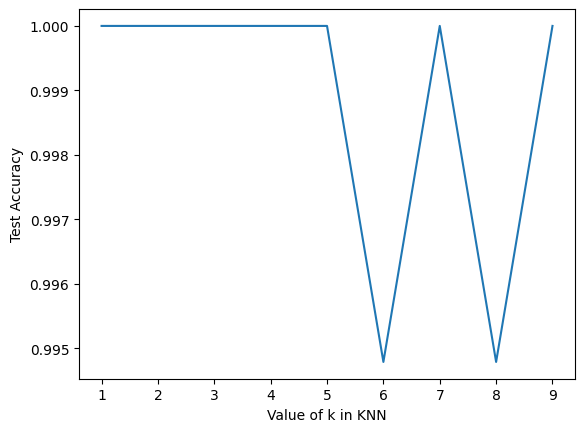

In [36]:
import matplotlib.pyplot as plt

k_range = range(1, 10)
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, np.ravel(y_train))
    y_pred = knn.predict(X_test)
    scores_list.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, scores_list)
plt.xlabel("Value of k in KNN")
plt.ylabel("Test Accuracy")

In [37]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, np.ravel(y_train))
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:,1]
# Call the function record and plot the Confusion Matrix and ROC Curve

print(classification_report(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00       118

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

